# **Title of Project**

Financial Market News Sentiment Analysis

-------------

## **Objective**

This is data of Financial Market Top 25 news for the Day and Task is to Train and Predict Model for Overall Sentiment Analysis

## **Data Source**

https://github.com/YBIFoundation/Dataset/blob/main/Financial%20Market%20News.csv

## **Import Library**

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

## **Import Data**

In [79]:
df = pd.read_csv(r'https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Financial%20Market%20News.csv', encoding = "ISO-8859-1")

## **Describe Data**

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4101 non-null   object
 1   Label    4101 non-null   int64 
 2   News 1   4101 non-null   object
 3   News 2   4101 non-null   object
 4   News 3   4101 non-null   object
 5   News 4   4101 non-null   object
 6   News 5   4101 non-null   object
 7   News 6   4101 non-null   object
 8   News 7   4101 non-null   object
 9   News 8   4101 non-null   object
 10  News 9   4101 non-null   object
 11  News 10  4101 non-null   object
 12  News 11  4101 non-null   object
 13  News 12  4101 non-null   object
 14  News 13  4101 non-null   object
 15  News 14  4101 non-null   object
 16  News 15  4101 non-null   object
 17  News 16  4101 non-null   object
 18  News 17  4101 non-null   object
 19  News 18  4101 non-null   object
 20  News 19  4101 non-null   object
 21  News 20  4101 non-null   object
 22  

## **Data Visualization**

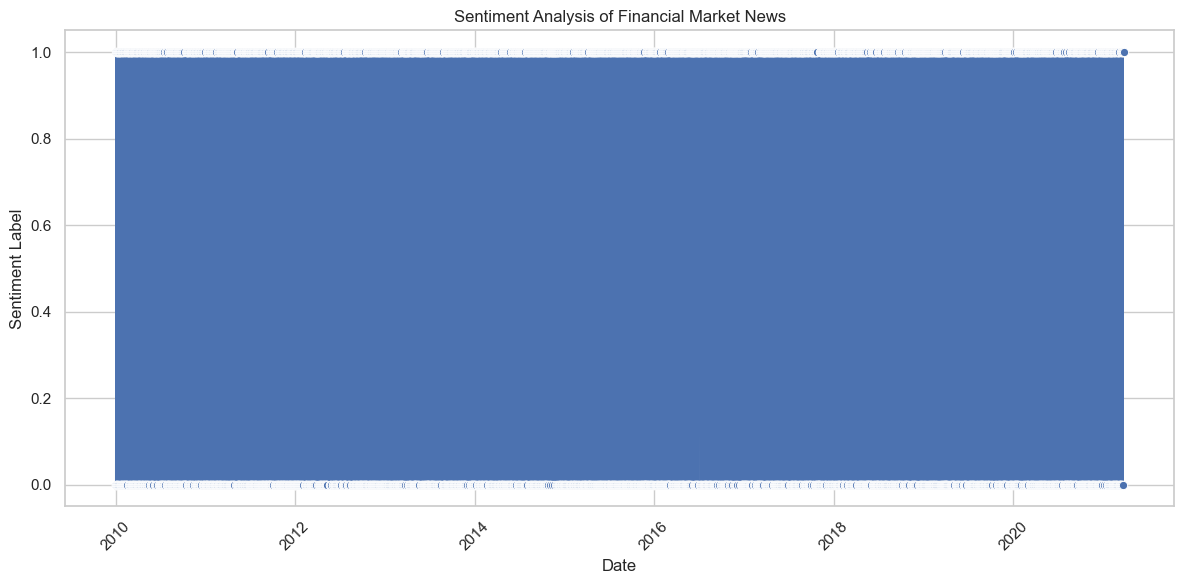

In [81]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Plot sentiment distribution over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Label', data=df, marker='o')

plt.title('Sentiment Analysis of Financial Market News')
plt.xlabel('Date')
plt.ylabel('Sentiment Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Data Preprocessing**

In [82]:
df.head()

,Date,Label,News 1,News 2,News 3,News 4,News 5,News 6,News 7,News 8,...,News 16,News 17,News 18,News 19,News 20,News 21,News 22,News 23,News 24,News 25
0,2010-01-01,0,McIlroy's men catch cold from Gudjonsson,Obituary: Brian Walsh,Workplace blues leave employers in the red,Classical review: Rattle,Dance review: Merce Cunningham,Genetic tests to be used in setting premiums,Opera review: La Bohème,Pop review: Britney Spears,...,Finland 0 - 0 England,Healy a marked man,Happy birthday Harpers & Queen,Win unlimited access to the Raindance film fes...,Labour pledges £800m to bridge north-south divide,Wales: Lib-Lab pact firm despite resignation,Donald Dewar,Regenerating homes regenerates well-being in ...,Win £100 worth of underwear,TV guide: Random views
1,2010-01-02,0,Warning from history points to crash,Investors flee to dollar haven,Banks and tobacco in favour,Review: Llama Farmers,War jitters lead to sell-off,Your not-so-secret history,Review: The Northern Sinfonia,Review: Hysteria,...,Why Wenger will stick to his Gunners,Out of luck England hit rock bottom,Wilkinson out of his depth,Kinsella sparks Irish power play,Brown banished as Scots rebound,Battling Wales cling to lifeline,Ehiogu close to sealing Boro move,Man-to-man marking,Match stats,French referee at centre of storm is no strang...
2,2010-01-03,0,Comment: Why Israel's peaceniks feel betrayed,Court deals blow to seizure of drug assets,An ideal target for spooks,World steps between two sides intent on war,What the region's papers say,Comment: Fear and rage in Palestine,Poverty and resentment fuels Palestinian fury,Republican feud fear as dissident is killed,...,FTSE goes upwardly mobile,At this price? BP Amoco,Go fish,Bosnian Serb blows himself up to evade law,Orange float delayed to 2001,"Angry factory workers root out fear, favours a...",Smith defied advice on dome payout,Xerox takes the axe to jobs,Comment: Refugees in Britain,Maverick who sparked the new intifada
3,2010-01-04,1,"£750,000-a-goal Weah aims parting shot",Newcastle pay for Fletcher years,Brown sent to the stands for Scotland qualifier,Tourists wary of breaking new ground,Canary Wharf climbs into the FTSE 100,Review: Bill Bailey,Review: Classical,Review: New Contemporaries 2000,...,More cash on way for counties,Cairns carries Kiwis to victory,Year of Blanchflower's flourish when Spurs sto...,New direct approach brings only pay-per-blues,Third Division round-up,Second Division round-up,First Division round-up,McLean ends his career with a punch,Heskey grabs triple crown,Weah on his way as City march on
4,2010-01-05,1,Leeds arrive in Turkey to the silence of the fans,One woman's vision offers loan lifeline,Working Lives: How world leaders worked,Working Lives: Tricks of the trade,"Working Lives: six-hour days, long lunches and...",Pop review: We Love UK,World music review: Marisa Monte,Art review: Hollingsworth/Heyer,...,Duisenberg in double trouble,Pru to cut pension charges,Art review: Paul Graham,Shearer shot sparks Boro humiliation,Ridsdale's lingering fears as Leeds revisit Tu...,Champions League: Rangers v Galatasaray,Champions League: Lazio v Arsenal,Lazio 1 - 1 Arsenal,England in Pakistan,England given olive-branch reception


## **Define Target Variable (y) and Feature Variables (X)**

In [83]:
# Drop irrelevant columns and non-numeric columns
X = df.drop(['Date', 'Label'], axis=1)  # Drop 'Date' and 'Label' columns to get feature variables
y = df['Label']  # Assuming 'Label' is the target variable

# Perform one-hot encoding for categorical columns like 'News 1' to 'News 25'
encoder = OneHotEncoder(handle_unknown='ignore')  # Sparse matrix by default
X_encoded = encoder.fit_transform(X)


## **Train Test Split**

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## **Modeling**

In [85]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

## **Model Evaluation**

In [86]:
# Evaluate model performance
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.5322777101096224


## **Prediction**

In [87]:
y_pred = model.predict(X_test)

## **Explaination**

The code begins by importing necessary libraries and reading data from a CSV file.

It prepares the data by defining features (X) and the target variable (y), then splits the data into training and testing sets.

A Logistic Regression model is trained on the training data (X_train, y_train).

Predictions are made on the test data (X_test), and the model's accuracy is evaluated using accuracy_score.

Finally, the script demonstrates how you might predict sentiment on new data using the trained model.

Adjustments can be made based on specific project requirements, such as handling different types of data or using alternative machine learning algorithms for sentiment analysis.